# DBpedia

In [7]:
import pandas as pd
import json
import os
import numpy as np

In [8]:
from load_balance.post_process import extract_qs

In [9]:
pathFIFOMU10 = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO_10'
pathFIFOMU22 = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO_22'
pathFIFOMU44 = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO_44'

pathPlan10 = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_PlanRGCN_10'
pathPlan22 = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_PlanRGCN_22'
pathPlan44 = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_PlanRGCN_44'

In [10]:
path_data = {
    'FIFO Load Balancer (MU=10)': pathFIFOMU10, 
    'FIFO Load Balancer (MU=22)': pathFIFOMU22, 
    'FIFO Load Balancer (MU=44)': pathFIFOMU44, 
    
    'PlanRGCN Load Balancer (MU=10)': pathPlan10, 
    'PlanRGCN Load Balancer (MU=22)': pathPlan22, 
    'PlanRGCN Load Balancer (MU=44)': pathPlan44,
}
from load_balance.post_process import get_overview_table
print(get_overview_table(path_data).to_latex())

\begin{tabular}{lrr}
\toprule
 & Good Queries & Time out \\
\midrule
FIFO Load Balancer (MU=10) & 604 & 48 \\
FIFO Load Balancer (MU=22) & 649 & 48 \\
FIFO Load Balancer (MU=44) & 656 & 49 \\
PlanRGCN Load Balancer (MU=10) & 2434 & 36 \\
PlanRGCN Load Balancer (MU=22) & 2441 & 36 \\
PlanRGCN Load Balancer (MU=44) & 2347 & 36 \\
\bottomrule
\end{tabular}



In [11]:

fifo10, fifo_timed10 = extract_qs(pathFIFOMU10)
fifo22, fifo_timed22 = extract_qs(pathFIFOMU22)
fifo44, fifo_timed44 = extract_qs(pathFIFOMU44)

mu10, mu10_timed = extract_qs(pathPlan10)
mu22, mu22_timed = extract_qs(pathPlan22)
mu44, mu44_timed = extract_qs(pathPlan44)
data = {
    'FIFO Load Balancer (MU=10)': fifo10, 
    'FIFO Load Balancer (MU=22)': fifo22, 
    'FIFO Load Balancer (MU=44)': fifo44, 
    
    'PlanRGCN Load Balancer (MU=10)': mu10, 
    'PlanRGCN Load Balancer (MU=22)': mu22, 
    'PlanRGCN Load Balancer (MU=44)': mu44,
}

In [12]:
from load_balance.post_process import get_time_outs
get_time_outs(data)

Time outs
FIFO Load Balancer (MU=10) Timeouts : 48
FIFO Load Balancer (MU=22) Timeouts : 48
FIFO Load Balancer (MU=44) Timeouts : 49
PlanRGCN Load Balancer (MU=10) Timeouts : 36
PlanRGCN Load Balancer (MU=22) Timeouts : 36
PlanRGCN Load Balancer (MU=44) Timeouts : 36


{'FIFO Load Balancer (MU=10)': 48,
 'FIFO Load Balancer (MU=22)': 48,
 'FIFO Load Balancer (MU=44)': 49,
 'PlanRGCN Load Balancer (MU=10)': 36,
 'PlanRGCN Load Balancer (MU=22)': 36,
 'PlanRGCN Load Balancer (MU=44)': 36}

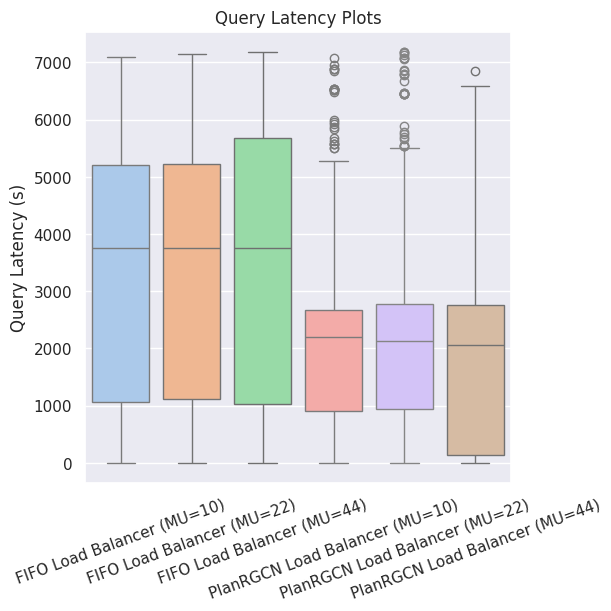

In [17]:
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True)

from load_balance.post_process import plot_box_latency, plot_box_ex_time
import matplotlib.pyplot as plt
def plot_box_latency(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['latency'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    #ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
    
plot_box_latency(data)

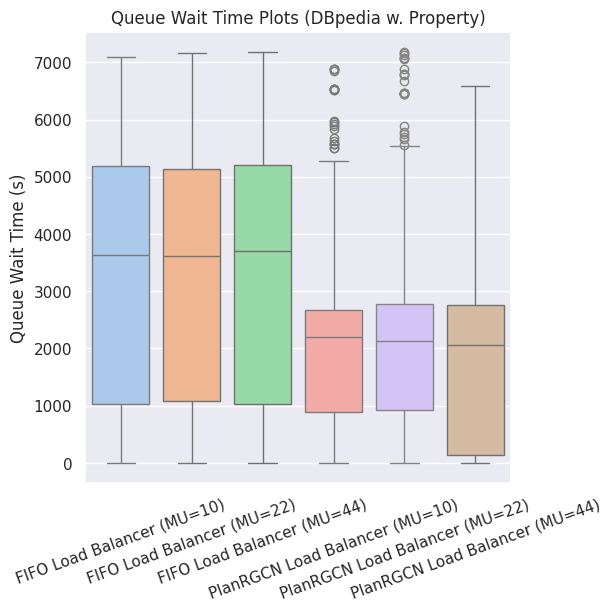

In [20]:
from load_balance.post_process import plot_box_queu_wait_time
def plot_box_queu_wait_time(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['queue_wait_time'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (s)')
    ax.set_title("Queue Wait Time Plots (DBpedia w. Property)")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
plot_box_queu_wait_time(data)

FIFO Load Balancer (MU=10)__________
25%  0.9940006493346386
mean  0.9499515197636428
75%  0.9999834531677426
FIFO Load Balancer (MU=22)__________
25%  0.9954343827939937
mean  0.9527832052545518
75%  0.9999901052383572
FIFO Load Balancer (MU=44)__________
25%  0.9960604503473971
mean  0.9514931961729761
75%  0.9999903127698513
PlanRGCN Load Balancer (MU=10)__________
25%  0.9998116866077063
mean  0.9847868858445504
75%  0.9999812211365315
PlanRGCN Load Balancer (MU=22)__________
25%  0.9998373398959546
mean  0.9851761920740546
75%  0.999989714373595
PlanRGCN Load Balancer (MU=44)__________
25%  0.9997274369506074
mean  0.9495634087776776
75%  0.99998894221788


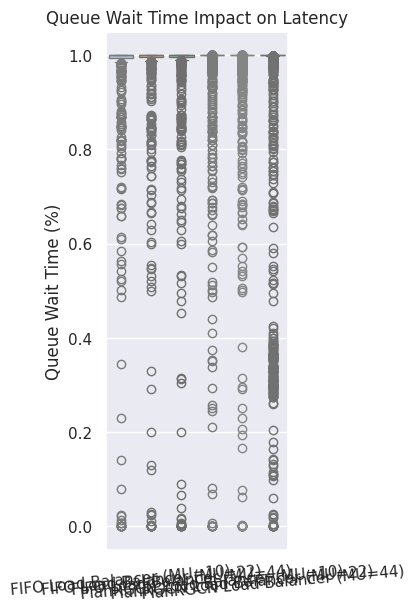

In [21]:
def plot_box_queu_wait_time_percentage(dct, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        k_queu_wait_time = [q['queue_wait_time']/q['latency'] for q in dct[k]]
        print(f'{k}__________')
        print("25% ",np.quantile(k_queu_wait_time,q=0.25))
        print("mean ", np.mean(k_queu_wait_time))
        print("75% ", np.quantile(k_queu_wait_time,q=0.75))
        ax = sns.boxplot(y=k_queu_wait_time,x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (%)')
    ax.set_title("Queue Wait Time Impact on Latency")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
plot_box_queu_wait_time_percentage(data)

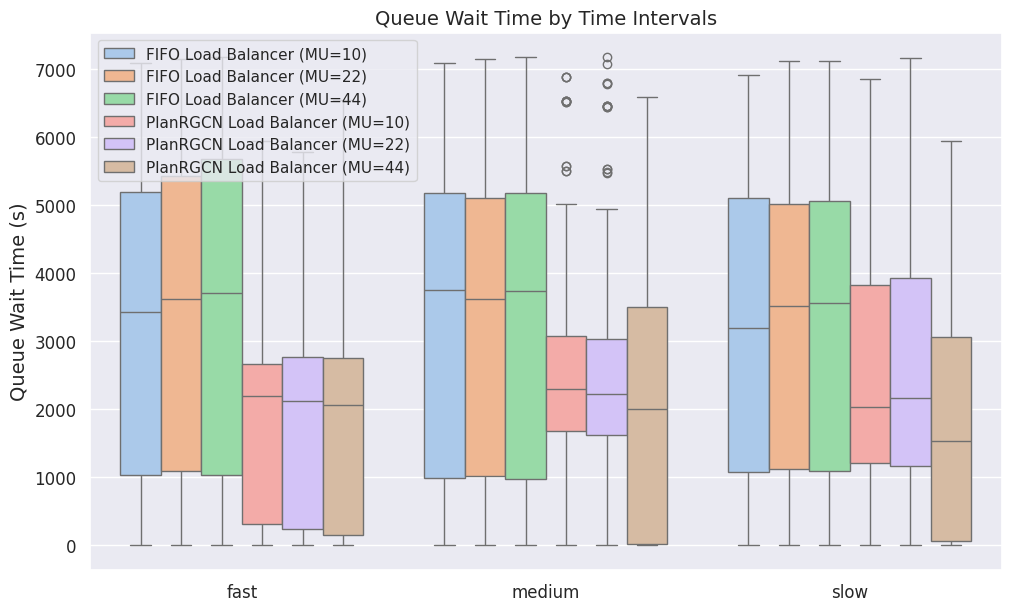

In [22]:
import pandas as pd

from load_balance.post_process import plot_box_queu_wait_time_int
    
plot_box_queu_wait_time_int(data)

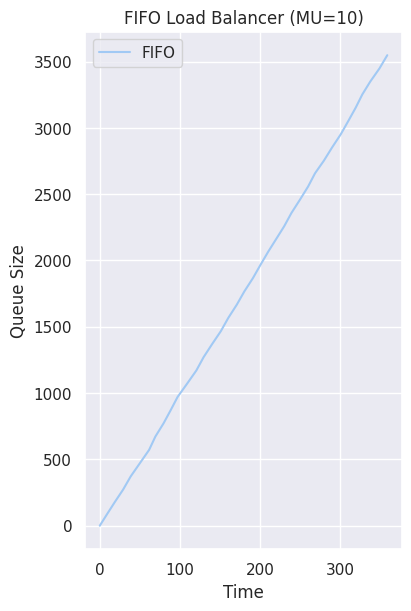

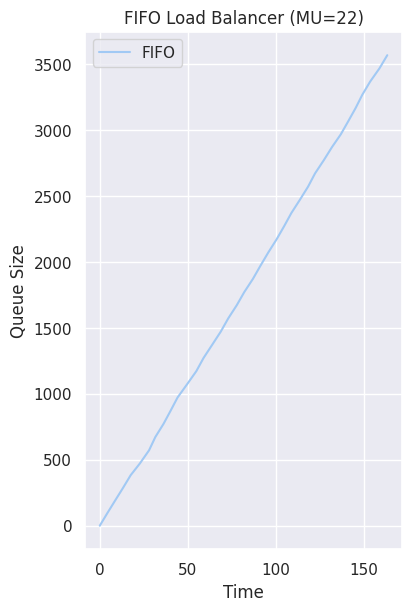

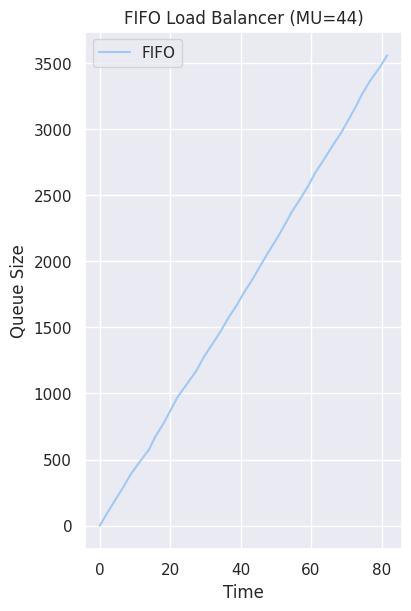

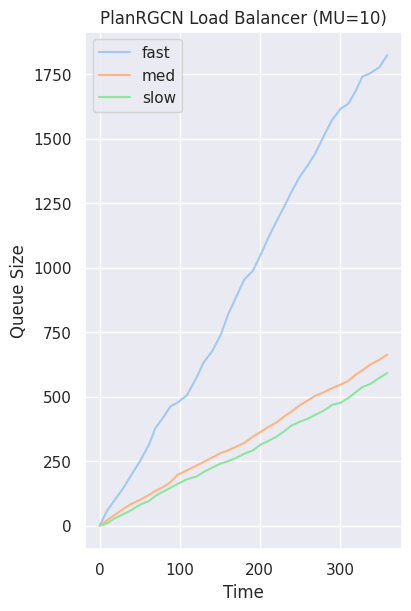

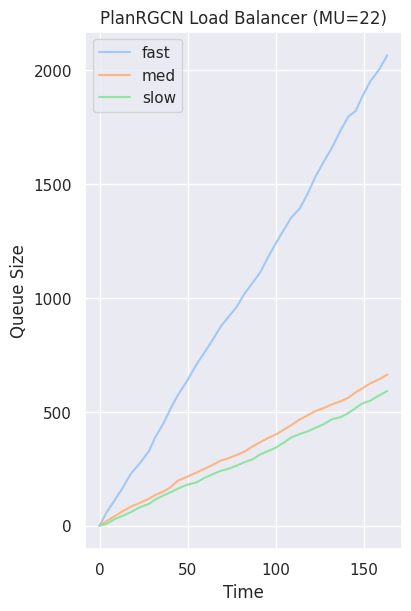

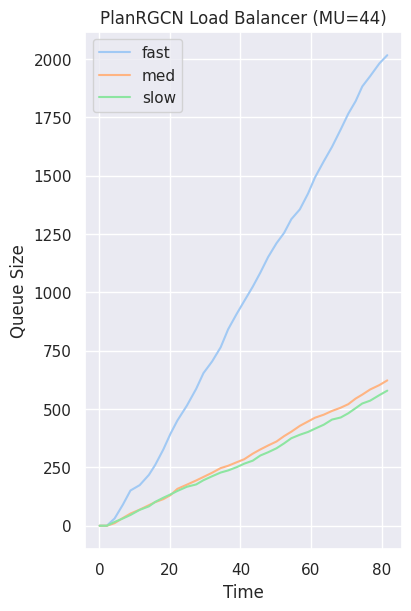

In [32]:
import ast
def get_queu_size(path):
    data = []
    for line in open(f'{path}/main_file.log').readlines():
        if '{' in line:
            data.append( ast.literal_eval('{'+line.split('{')[1]))
    return data
    
def plot_queu_size_helper(q_data, figsize=(4,6), title=None):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    try:
        for k in ['fast', 'med', 'slow']:
            ax = sns.lineplot(y=[q[k] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label=k)
    except:
        ax = sns.lineplot(y=[q['fifo'] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label='FIFO')
        
    ax.set_ylabel('Queue Size')
    ax.set_xlabel('Time')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_queu_size(path, figsize=(4,6), title=None):
    q_data = get_queu_size(path)
    plot_queu_size_helper(q_data, figsize=figsize, title=title)

for k in path_data.keys():
    plot_queu_size(path_data[k], title = k)

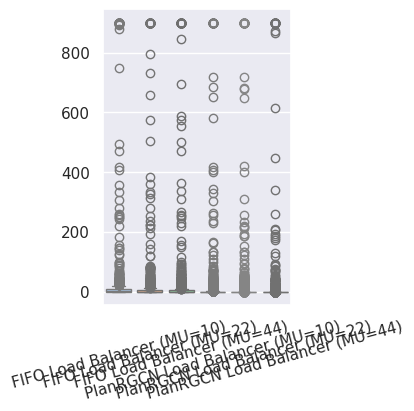

In [33]:
plot_box_ex_time(data)

## FIFO load balancer

In [1]:
import pandas as pd
import json
import os
import numpy as np

In [2]:
from load_balance.post_process import extract_qs

In [3]:
pathFIFO = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO'
pathPlan = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance'
pathOracle = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_oracle'
pathMU22 = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balanceMUNew2'
pathMU10 = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balanceMU10'

In [5]:
path_data = {
    'FIFO Load Balancer': pathFIFO, 
    'PlanRGCN Load Balancer': pathPlan, 
    'Oracle Load Balancer': pathOracle, 
    'PlanRGCN (MU=22)': pathMU22,
    'PlanRGCN (MU=10)': pathMU10
}

from load_balance.post_process import get_overview_table
print(get_overview_table(path_data).to_latex())

\begin{tabular}{lrr}
\toprule
 & Good Queries & Time out \\
\midrule
FIFO Load Balancer & 1141 & 50 \\
PlanRGCN Load Balancer & 5224 & 31 \\
Oracle Load Balancer & 5877 & 8 \\
PlanRGCN (MU=22) & 5922 & 5 \\
PlanRGCN (MU=10) & 5923 & 5 \\
\bottomrule
\end{tabular}



In [6]:
"""
{'query': '{"ID": "http://lsq.aksw.org/lsqQuery-JAG3AHd7PqKLCEiTgFKwJFO568s0p4jxGGaU8dz_lFE", "text": "PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX wdt: <http://www.wikidata.org/prop/direct/> SELECT ?var1 WHERE { ?var1 wdt:P2346 \\"180659\\" } ", "true_interval": "0"}',
 'start_time': 1705466079.4959524,
 'arrival_time': 1705466079.5066175,
 'queue_arrival_time': 1705466079.5613253,
 'query_execution_start': 1705466079.5627425,
 'query_execution_end': 1705466079.713499,
 'execution_time': 0.1507565975189209,
 'response': 'ok',
 'ID': 'http://lsq.aksw.org/lsqQuery-JAG3AHd7PqKLCEiTgFKwJFO568s0p4jxGGaU8dz_lFE',
 'text': 'PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX wdt: <http://www.wikidata.org/prop/direct/> SELECT ?var1 WHERE { ?var1 wdt:P2346 "180659" } ',
 'true_interval': '0',
 'ex_time': 0.1507565975189209,
 'latency': 0.20688152313232422,
 'queue_wait_time': 0.0014171600341796875}
"""

fifo, fifo_timed = extract_qs(pathFIFO)
qppBalance, plan_timed = extract_qs(pathPlan)
oracle, oracle_timed = extract_qs(pathOracle)
mu22, mu22_timed = extract_qs(pathMU22)
mu10, mu10_timed = extract_qs(pathMU10)
data = {'FIFO Load Balancer': fifo, 'PlanRGCN Load Balancer': qppBalance, 'Oracle Load Balancer': oracle, 'PlanRGCN (MU=22)': mu22,'PlanRGCN (MU=10)': mu10}
len(fifo), len(qppBalance), len(oracle), len(mu22), len(mu10)

(1191, 5255, 5885, 5958, 5958)

In [5]:
len(fifo_timed),len(plan_timed), len(oracle_timed), len(mu22_timed), len(mu10_timed)

(50, 25, 3, 2, 2)

In [6]:
fifo[0]

{'query': '{"ID": "http://lsq.aksw.org/lsqQuery-JAG3AHd7PqKLCEiTgFKwJFO568s0p4jxGGaU8dz_lFE", "text": "PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX wdt: <http://www.wikidata.org/prop/direct/> SELECT ?var1 WHERE { ?var1 wdt:P2346 \\"180659\\" } ", "true_interval": "0"}',
 'start_time': 0,
 'arrival_time': 0.010665178298950195,
 'queue_arrival_time': 0.06537294387817383,
 'query_execution_start': 0.06679010391235352,
 'query_execution_end': 0.21754670143127441,
 'execution_time': 0.1507565975189209,
 'response': 'ok',
 'ID': 'http://lsq.aksw.org/lsqQuery-JAG3AHd7PqKLCEiTgFKwJFO568s0p4jxGGaU8dz_lFE',
 'text': 'PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX wdt: <http://www.wikidata.org/prop/direct/> SELECT ?var1 WHERE { ?var1 wdt:P2346 "180659" } ',
 'true_interval': '0',
 'ex_time': 0.1507565975189209,
 'latency': 0.20688152313232422,
 'queue_wait_time': 0.0014171600341796875,
 'process': 'w_1.json'}

In [7]:
from load_balance.post_process import get_time_outs
get_time_outs(data)

Time outs
FIFO Load Balancer Timeouts : 50
PlanRGCN Load Balancer Timeouts : 31
Oracle Load Balancer Timeouts : 8
PlanRGCN (MU=22) Timeouts : 5
PlanRGCN (MU=10) Timeouts : 5


{'FIFO Load Balancer': 50,
 'PlanRGCN Load Balancer': 31,
 'Oracle Load Balancer': 8,
 'PlanRGCN (MU=22)': 5,
 'PlanRGCN (MU=10)': 5}

In [8]:
from load_balance.post_process import get_good_qs
get_good_qs(data)
#print(f"QPP LB Good Queries : {np.sum([1 for x in qppBalance if x['response'] == 'ok'])}")

Good Queries
FIFO Load Balancer Good Queries : 1141
PlanRGCN Load Balancer Good Queries : 5224
Oracle Load Balancer Good Queries : 5877
PlanRGCN (MU=22) Good Queries : 5922
PlanRGCN (MU=10) Good Queries : 5923


{'FIFO Load Balancer': 1141,
 'PlanRGCN Load Balancer': 5224,
 'Oracle Load Balancer': 5877,
 'PlanRGCN (MU=22)': 5922,
 'PlanRGCN (MU=10)': 5923}

In [9]:
from load_balance.post_process import get_good_qs
print("Not Good Queries")
for k in data.keys():
    print(f"{k} not Good Queries : {[x for x in data[k] if x['response'] != 'ok']}")

Not Good Queries
FIFO Load Balancer not Good Queries : [{'query': '{"ID": "http://lsq.aksw.org/882", "text": "SELECT * WHERE { ?x1 <http://www.wikidata.org/prop/direct/P31> <http://www.wikidata.org/entity/Q5> . ?x1 <http://www.wikidata.org/prop/direct/P937> ?x2 . }", "true_interval": "2"}', 'start_time': 0, 'arrival_time': 2.1880524158477783, 'queue_arrival_time': 2.188120126724243, 'query_execution_start': 19.96798610687256, 'query_execution_end': 920.0697057247162, 'execution_time': 900.1017196178436, 'response': 'timed out', 'ID': 'http://lsq.aksw.org/882', 'text': 'SELECT * WHERE { ?x1 <http://www.wikidata.org/prop/direct/P31> <http://www.wikidata.org/entity/Q5> . ?x1 <http://www.wikidata.org/prop/direct/P937> ?x2 . }', 'true_interval': '2', 'ex_time': 900.1017196178436, 'latency': 917.8816533088684, 'queue_wait_time': 17.779865980148315, 'process': 'w_1.json'}, {'query': '{"ID": "http://lsq.aksw.org/806", "text": "SELECT * WHERE { ?x1 <http://www.wikidata.org/prop/direct/P31> <htt

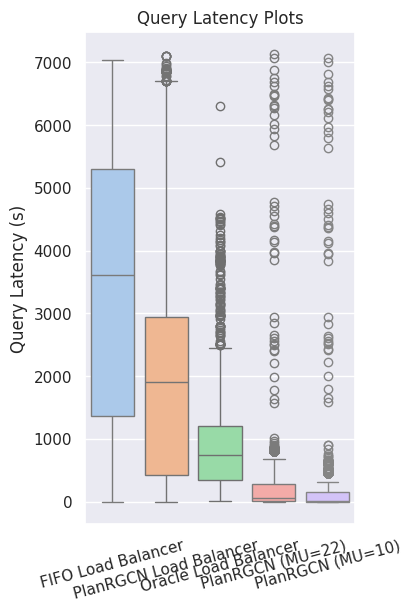

In [10]:
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True)

from load_balance.post_process import plot_box_latency, plot_box_ex_time
plot_box_latency(data)

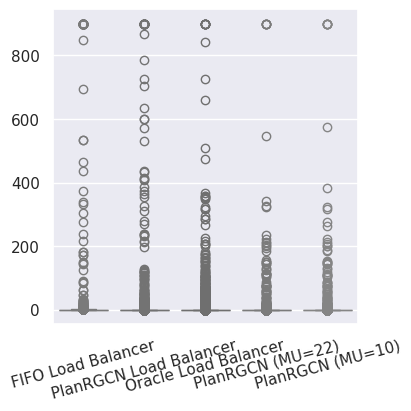

In [11]:
plot_box_ex_time(data)

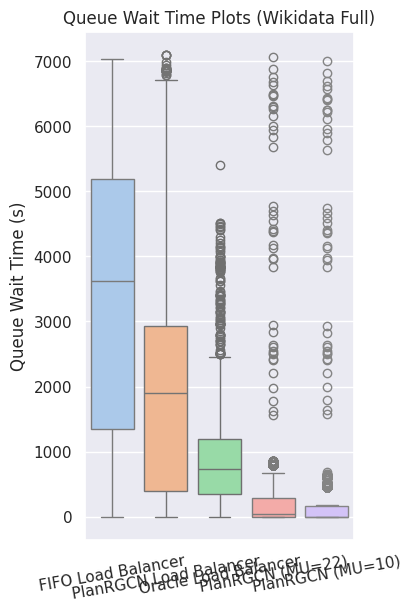

In [12]:
from load_balance.post_process import plot_box_queu_wait_time
plot_box_queu_wait_time(data)

In [13]:
for k in data.keys():
    print(f"Average Queue Wait Time '{k}' {np.mean([x['queue_wait_time'] for x in data[k]])}")

Average Queue Wait Time 'FIFO Load Balancer' 3352.3182545837285
Average Queue Wait Time 'PlanRGCN Load Balancer' 1816.0588650905327
Average Queue Wait Time 'Oracle Load Balancer' 800.9399630643801
Average Queue Wait Time 'PlanRGCN (MU=22)' 202.7620738140292
Average Queue Wait Time 'PlanRGCN (MU=10)' 139.6444534638871


FIFO Load Balancer__________
25%  0.9997908572708103
mean  0.9655699117580977
75%  0.9999912341674837
PlanRGCN Load Balancer__________
25%  0.9997578302207137
mean  0.9894794630316326
75%  0.9999898587138676
Oracle Load Balancer__________
25%  0.9997677524433894
mean  0.9929234156398667
75%  0.9999734403067164
PlanRGCN (MU=22)__________
25%  0.4305207111610283
mean  0.7587470710001313
75%  0.9999636223923378
PlanRGCN (MU=10)__________
25%  0.08421138073463041
mean  0.5430764521489837
75%  0.9998846932549968


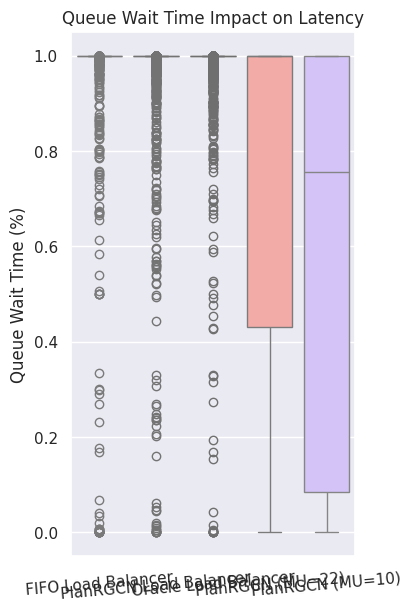

In [14]:
import matplotlib.pyplot as plt

def plot_box_queu_wait_time_percentage(dct, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        k_queu_wait_time = [q['queue_wait_time']/q['latency'] for q in dct[k]]
        print(f'{k}__________')
        print("25% ",np.quantile(k_queu_wait_time,q=0.25))
        print("mean ", np.mean(k_queu_wait_time))
        print("75% ", np.quantile(k_queu_wait_time,q=0.75))
        ax = sns.boxplot(y=k_queu_wait_time,x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (%)')
    ax.set_title("Queue Wait Time Impact on Latency")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
plot_box_queu_wait_time_percentage(data)

In [15]:
from load_balance.post_process import calculate_avg_latency
calculate_avg_latency(data)

FIFO Load Balancer:  3396.9303115505213
PlanRGCN Load Balancer:  1824.6464704180535
Oracle Load Balancer:  805.8207892485565
PlanRGCN (MU=22):  204.91129743537863
PlanRGCN (MU=10):  141.83717037804584


{'FIFO Load Balancer': 3396.9303115505213,
 'PlanRGCN Load Balancer': 1824.6464704180535,
 'Oracle Load Balancer': 805.8207892485565,
 'PlanRGCN (MU=22)': 204.91129743537863,
 'PlanRGCN (MU=10)': 141.83717037804584}

In [16]:
#lat_total_fifo/len(fifo), lat_total_qpp/len(qppBalance)

In [17]:
#avg_fifo =lat_total_fifo/len(fifo)
#avg_qpp = lat_total_qpp/len(qppBalance)
#relative_impro = ((lat_total_qpp-lat_total_fifo)/lat_total_fifo)*100
#relative_impro

In [18]:
#((lat_total_fifo-lat_total_qpp)/lat_total_qpp)*100

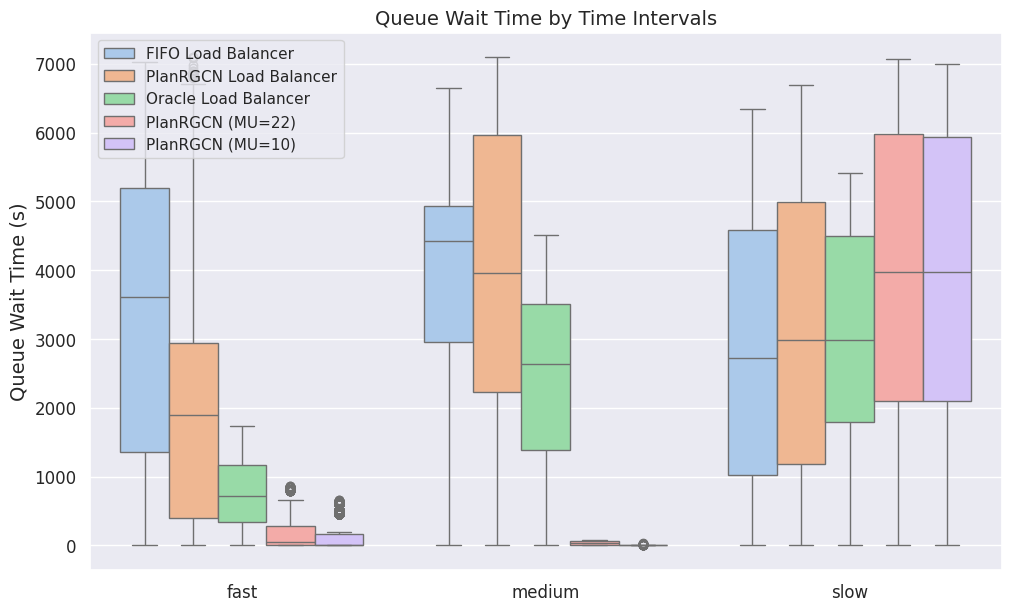

In [19]:
import pandas as pd

from load_balance.post_process import plot_box_queu_wait_time_int
    
plot_box_queu_wait_time_int(data)

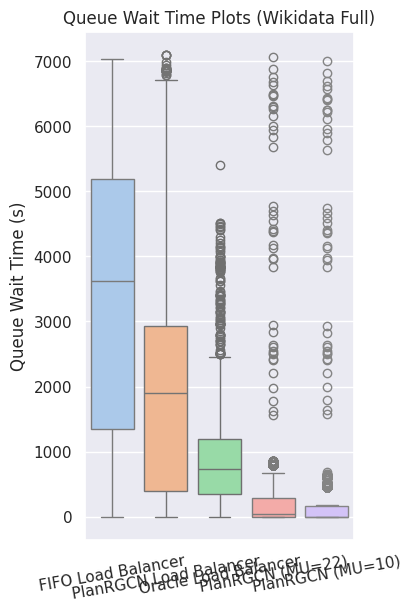

In [20]:
def plot_box_queu_wait_time(dct, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['queue_wait_time'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (s)')
    ax.set_title("Queue Wait Time Plots (Wikidata Full)")
    ax.tick_params(axis='x', rotation=10)
    plt.show()
plot_box_queu_wait_time(data)

In [21]:
data.keys()

dict_keys(['FIFO Load Balancer', 'PlanRGCN Load Balancer', 'Oracle Load Balancer', 'PlanRGCN (MU=22)', 'PlanRGCN (MU=10)'])

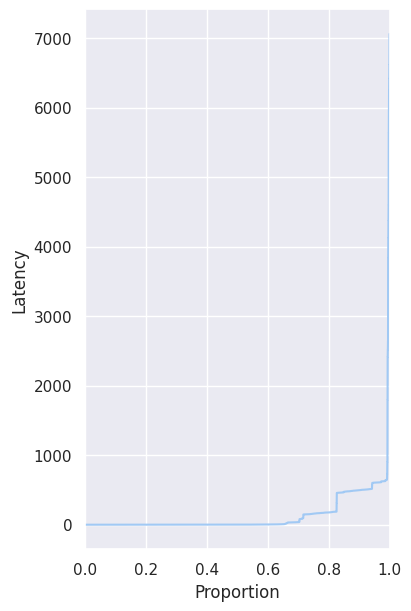

In [22]:
def plot_cdf_ex(dct, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax = sns.ecdfplot(y=[q['latency'] for q in dct['PlanRGCN (MU=10)']], ax=ax)
    ax.set_ylabel('Latency')
    #ax.set_title("Queue Wait Time Plots (Wikidata Full)")
    #ax.tick_params(axis='x', rotation=10)
    plt.show()
plot_cdf_ex(data)

In [28]:
import ast
def get_queu_size(path):
    data = []
    for line in open(f'{path}/main_file.log').readlines():
        if '{' in line:
            data.append( ast.literal_eval('{'+line.split('{')[1]))
    return data
queu_data = get_queu_size(pathMU22)
queu_data

FileNotFoundError: [Errno 2] No such file or directory: '/data/wikidata_0_1_10_v3_path_weight_loss/load_balanceMUNew2/main_file.log'

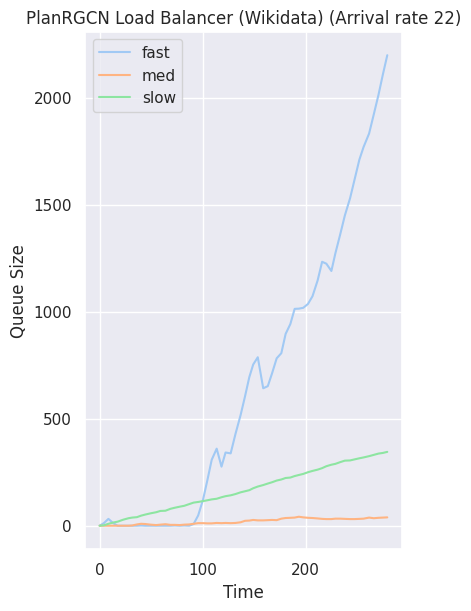

In [45]:
def plot_queu_size_helper(q_data, figsize=(4,6), title=None):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in ['fast', 'med', 'slow']:
        ax = sns.lineplot(y=[q[k] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label=k)
    ax.set_ylabel('Queue Size')
    ax.set_xlabel('Time')
    plt.title(title)
    plt.legend()
    plt.show()
def plot_queu_size(path, figsize=(4,6), title=None):
    q_data = get_queu_size(path)
    plot_queu_size_helper(q_data, figsize=figsize, title=title)
    
plot_queu_size(pathMU22, title = 'PlanRGCN Load Balancer (Wikidata) (Arrival rate 22)')